# Einführung Titanic-Datensatz

Das Ziel der heutigen Vorlesung ist den Titanic-Datensatz von kaggle.com zu untersuchen.

Eine Beschreibung des Titanic-Datensatz ist hier zu finden:
https://www.kaggle.com/c/titanic
***
```
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


VARIABLE DESCRIPTIONS:
survived        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```
***


Im Rahmen der Aufgaben werden folgende bereits bekannte Frameworks verwendet:
- numPy:   Numerik-Framework, "Brücke" zu Fortran / C (http://www.numpy.org/)
- pandas:  Datenstrukturen und zugehörige Operationen (http://pandas.pydata.org/)
- pyplot:  prozedurales Interface für Matplotlib          (http://matplotlib.org/users/pyplot_tutorial.html)

Im Folgenden werden die für diese Aufgabe benötigten Imports getätigt, sowie den Datensatz als *Pandas Dataframe* eingelesen:

In [1]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

DATA_FILE = './Data/original_titanic.csv'
df = pd.read_csv(DATA_FILE, header=0)

## 1.) Datenanalyse mit Pandas 
Das DataFrame Object aus der panda Bibliothek ist eine mächtige Datenstruktur mit vielen praktischen Funktionen um mit großen Datensätzen umzugehen. Um einen schnellen Einstieg in pandas zu erhalten empfehle ich Ihnen ein Blick in das 10 Minutes to pandas Tutorial zu werfen: http://pandas.pydata.org/pandas-docs/stable/10min.html. Umfangreiche Informationen finden Sie in der pandas Dokumentation (http://pandas.pydata.org/pandas-docs/stable/index.html). Häufig ist auch die ipython Autovervollständigung (TAB) ein gutes Hilfsmittel um entsprechende Methoden das DataFrames zu finden.

Im Folgenden finden Sie einige einfache, selbsterklärende Beispiele für den Umgang mit dem Pandas DataFrame. Führen Sie die Beispiele aus (z.B. in dem Sie bei fokussierter Zelle Shift+ENTER drücken) und schauen Sie sich die Ergebnisse an. 
 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Home-Dest    745 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.381971,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486055,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Home-Dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


## header


In [5]:
df.Age[0:5]

0    29.00
1     0.92
2     2.00
3    30.00
4    25.00
Name: Age, dtype: float64

In [6]:
print(df[['Age','Sex']][0:3])

     Age     Sex
0  29.00  female
1   0.92    male
2   2.00  female


In [7]:
df.loc[1:10,'Age']

1      0.92
2      2.00
3     30.00
4     25.00
5     48.00
6     63.00
7     39.00
8     53.00
9     71.00
10    47.00
Name: Age, dtype: float64

In [8]:
x = df[['Age','Sex']][(df.Sex == 'female') & (df.Age > 20)][0:5]
print(x)

     Age     Sex
0   29.0  female
4   25.0  female
6   63.0  female
8   53.0  female
12  24.0  female


In [9]:
print(type (x))
print(type (x.values))
for i,j in x.values:
    print("age %d, sex %s" % (i,j))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
age 29, sex female
age 25, sex female
age 63, sex female
age 53, sex female
age 24, sex female


In [10]:
df.Age.groupby(df.Sex).mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [11]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

Um einen ersten Eindruck von den vorliegenden Daten zu beokmmen sowie die Möglichkeiten des DataFrame Objektes kennen zu lernen untersuchen Sie bitte die folgenden Fragestellungen: 

1.) Wie Umfangreich ist der Titanic Datensatz? Wieviel Merkmale (Spalten) bzw. Objekte (Datenreihen) liegen vor?

In [12]:
# TODO implement
print("Anzahl der Reihen:",len(df))
print("Anzahl der Spalten:", len(df.columns))
print("Anzahl der EInträge:", len(df.columns)*len(df))


Anzahl der Reihen: 1309
Anzahl der Spalten: 13
Anzahl der EInträge: 17017


2.) Wie sehen die ersten zehn Objekte aus? Was fällt Ihnen auf? Verstehen Sie die Bedeutung der Merkmale?


In [13]:
# TODO implement
#print(df[0:10])
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Home-Dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,"New York, NY"
6,7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,"Hudson, NY"
7,8,0,1,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,"Belfast, NI"
8,9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,"Bayside, Queens, NY"
9,10,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,"Montevideo, Uruguay"


In [14]:
#Manche werte sind NaN, Buchstaben in der Ticket number, 

3.) Welche Datentypen haben die einzelnen Merkmale?

In [15]:
# TODO implement
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Home-Dest    745 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB
None


4.) Welche Merkmale sind quantitativ, welche sind qualitativ?

<b>Quantitative Merkmale</b>:  intervallskalierte metrische Werte, z.B. Körpergewicht, Einkommen. 
Für diese Merkmale können verschiedene mathematische Rechenoperationen durchgeführt werden, wie zum Beispiel die Errechnung eines Durchschnitts <br>

<b>Qualitative Merkmale</b>:  Merkmale lassen sich eindeutig in Kategorien unterscheiden, diese Unterteilung besitzt jedoch keinen mathematischen Wert, z.B. Geschlecht, Religionszugehörigkeit. Für diese Merkmale kann lediglich ein Befragungsergebnis in Anteilen (x von 100%) wiedergegeben werden <br>

<b>Beispiel aus dem Skript</b>:

| Merkmal    | Wert                  | Typ |
|:-----------|:----------------------|-------|
| goldEarned | 15 Stk.               | Quantitativ |
| kills      | 11 Stk.               | Quantitativ |
| championId | 4312234               | Qualitativ |
| lane       | {bootom, middle, top} | Qualitativ |
| role       | {duo, solo, support}  | Qualitativ |

| PassengerId |	Survived | Pclass | Name | Sex | Age | SibSp |Parch | Ticket | Fare | Cabin | Embarked | Home-Dest |
|  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |--- |
| Qualitativ | Qualitativ | Qualitativ | Qualitativ | Qualitativ | Quantitativ | Quantitativ | Quantitativ | Quantitativ | Quantitativ | Qualitativ| Qualitativ | Qualitativ |

5.) Wieviel Prozent der Passagiere haben das Unglück überlebt?

In [17]:
# TODO implement
from functools import reduce

survived = reduce((lambda x, y: x + y), df.Survived)
#print(df.Survived.value_counts())

print("Survived Perventage", survived / len(df) *100, "%")

Survived Perventage 38.19709702062643 %


6.) Wieviel Prozent der Überlebenden waren Frauen?

In [18]:
# TODO implement
df.Age.groupby(df.Sex).value_counts()
#df.groupby(['Sex','Survived']).value_counts()
Average = df.Survived[(df.Survived == 1)].groupby(df.Sex).apply(lambda x: x.count()/df.Survived[(df.Survived == 1)].count())
print(Average)

Sex
female    0.678
male      0.322
Name: Survived, dtype: float64


7.) Ermitteln Sie jeweils den Mittelwert des Alters für die folgenden Gruppen:

7.a) für alle Passagiere

In [19]:
# TODO implement
df.mean().Age

29.881137667304014

7.b) getrennt nach Geschlecht

In [20]:
# TODO implement
df.groupby(df.Sex).mean().Age

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

7.c) für alle Überlebenden

In [21]:
# TODO implement
print(df.groupby(df.Survived).mean().Age)
print(df.Age[(df.Survived == 1)].mean())


Survived
0    30.545363
1    28.918244
Name: Age, dtype: float64
28.91824355971897


7.d) für alle Frauen welche überlebt haben

In [22]:
# TODO implement
df.Age[(df.Survived == 1) & (df.Sex == 'female')].mean()


29.815376712328767

7.e) für alle Frauen welche überlebt haben, gruppiert nach der Passagier Klasse (Pclass)

In [23]:
# TODO implement
df.Age[(df.Survived == 1) & (df.Sex == 'female')].groupby(df.Pclass).mean()

Pclass
1    37.109375
2    26.711087
3    20.814861
Name: Age, dtype: float64

7.f) für alle Frauen welche nicht überlebt haben, gruppiert nach der Passagier Klasse (Pclass)

In [24]:
# TODO implement
df.Age[(df.Survived == 0) & (df.Sex == 'female')].groupby(df.Pclass).mean()

Pclass
1    35.200000
2    34.090909
3    23.418750
Name: Age, dtype: float64

## 2.) Vorverarbeitung - Imputation (Statistik) - Datenlücken interpolieren
Wie Sie vielleicht schon bei der ersten Aufgabe bemerkt haben, fehlen einzelne Merkmalsausprägungen im vorliegenden Datensatz (NaN-Werte). Dies ist in sofern problematisch da je nach Verfahren, unter Umständen die ganze Datenreihe nicht mehr weiter verarbeitet werden kann. Im vorliegenden Datensatz fehlen Werte in den Merkmalen 'Age' sowie 'Cabin' (siehe df.info()). Da beim Merkmal Cabin nur 204 Einträge vorliegen ist es hier sehr schwer die fehlenden Ausprägungen zu interpolieren. Wir konzentrieren uns daher vorerst auf das Alter, da hier eine größere Datenmenge vorliegt.

Vervollständigen sie die Datenlücken in der Spalte 'Age'. Nutzen Sie dabei Wissen aus den vorliegenden Daten um die einzelnen Datenreihen zuverlässig zu vervollständigen. Es bietet sich an diesen Schritt in eine Funktion auszulagern. Überprüfen Sie Ihr Ergebniss.

In [25]:
def prepareData(df):
    #to set a selection of a data frame please dont use the chained [] operator, but the .loc operator
    #(see http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy for details)

    #minimal working example to set all null age values to 42 - probably you can do better :-)

    df.loc[(df.Sex == "male")   &(df.Survived == 0) & (df.Pclass==1) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "male")   &(df.Survived == 0) & (df.Pclass==1), "Age"].mean()
    df.loc[(df.Sex == "male")   &(df.Survived == 0) & (df.Pclass==2) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "male")   &(df.Survived == 0) & (df.Pclass==2), "Age"].mean()
    df.loc[(df.Sex == "male")   &(df.Survived == 0) & (df.Pclass==3) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "male")   &(df.Survived == 0) & (df.Pclass==3), "Age"].mean()
    df.loc[(df.Sex == "male")   &(df.Survived == 1) & (df.Pclass==1) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "male")   &(df.Survived == 1) & (df.Pclass==1), "Age"].mean()
    df.loc[(df.Sex == "male")   &(df.Survived == 1) & (df.Pclass==2) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "male")   &(df.Survived == 1) & (df.Pclass==2), "Age"].mean()
    df.loc[(df.Sex == "male")   &(df.Survived == 1) & (df.Pclass==3) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "male")   &(df.Survived == 1) & (df.Pclass==3), "Age"].mean()
    df.loc[(df.Sex == "female") &(df.Survived == 0) & (df.Pclass==1) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "female") &(df.Survived == 0) & (df.Pclass==1), "Age"].mean()
    df.loc[(df.Sex == "female") &(df.Survived == 0) & (df.Pclass==2) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "female") &(df.Survived == 0) & (df.Pclass==2), "Age"].mean()
    df.loc[(df.Sex == "female") &(df.Survived == 0) & (df.Pclass==3) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "female") &(df.Survived == 0) & (df.Pclass==3), "Age"].mean()
    df.loc[(df.Sex == "female") &(df.Survived == 1) & (df.Pclass==1) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "female") &(df.Survived == 1) & (df.Pclass==1), "Age"].mean()
    df.loc[(df.Sex == "female") &(df.Survived == 1) & (df.Pclass==2) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "female") &(df.Survived == 1) & (df.Pclass==2), "Age"].mean()
    df.loc[(df.Sex == "female") &(df.Survived == 1) & (df.Pclass==3) & df.Age.isnull(),"Age"] =  df.loc[(df.Sex == "female") &(df.Survived == 1) & (df.Pclass==3), "Age"].mean()
    
    return df
print(df.Age.isnull().value_counts())
df = prepareData(df)
print(df.Age.isnull().value_counts())



False    1046
True      263
Name: Age, dtype: int64
False    1309
Name: Age, dtype: int64


## 3.) Visualisierung

Um Zusammenhänge in Daten verstehen zu können, ist es essentiell die Daten zu visualisieren. Nutzen sie für die folgende Aufgabe die python Bibliothek matplotlib (siehe http://matplotlib.org/users/pyplot_tutorial.html). Da uns unsere Daten als padas DataFrame vorliegen, ist es für die einfacheren plots komfortabler die von pandas zur Verfügung gestellten wrapper methoden zu nutzen (siehe http://pandas.pydata.org/pandas-docs/stable/visualization.html).


1.) Visualisieren Sie die absolute Verteilung der Überlebenden anhand eines Barplots. (Tipp: plt.hist(..) oder df.Survived.hist())

(array([809., 500.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

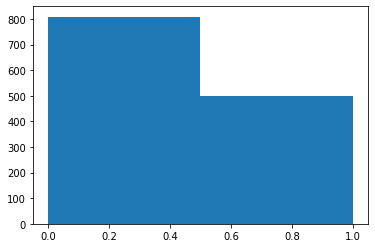

In [42]:
# TODO implement
#df.groupby(df.Survived).hist()
#df.groupby(df.Survived).size().hist()
#print(df.groupby(df.Survived).size())
#df.Survived.hist()
#df.groupby(df.Survived).size().plot.bar()
plt.hist(df.Survived, bins = 2)

2.) Visualisieren Sie die Anzahl der Passagiere in der jeweiligen Klasse (Pclass)

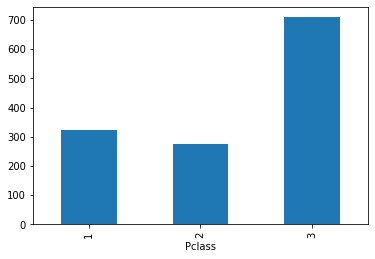

In [27]:
# TODO implement
df.groupby(df.Pclass).size().plot.bar()

(array([323., 277., 709.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 3 Patch objects>)

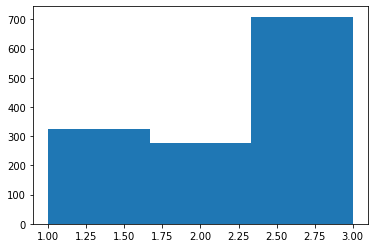

In [45]:
plt.hist(df.Pclass, bins = 3)

3.) Visualisieren Sie die Verteilung des Alters pro Geschlecht als Histogramm. 

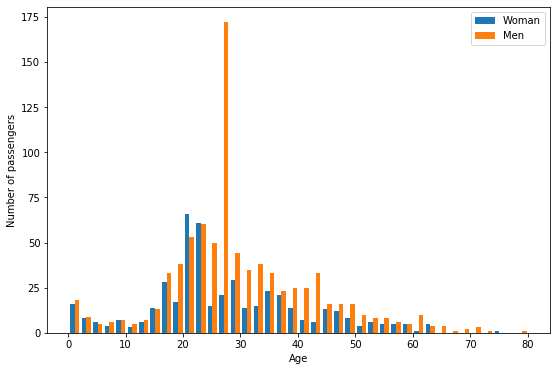

In [88]:
# TODO implement

woman_Age = df[df.Sex == 'female']["Age"]
man_Age = df[df.Sex == 'male']["Age"]

figure = plt.figure(figsize=(9,6))
plt.hist([woman_Age, man_Age], stacked=False,
         bins = 40,label = ['Woman','Men'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()


4.) Visualisiern Sie die Verteilung des Alters pro Klasse als Wahrscheinlichkeitsdichte. Stellen Sie die Graphen gemeinsam in einem Plot dar (Tipp: plot(kind='density'), möglicherweise müssen sie hier das Python-Paket *scipy* nachinstallieren).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8a9c2e450>],
      dtype=object)

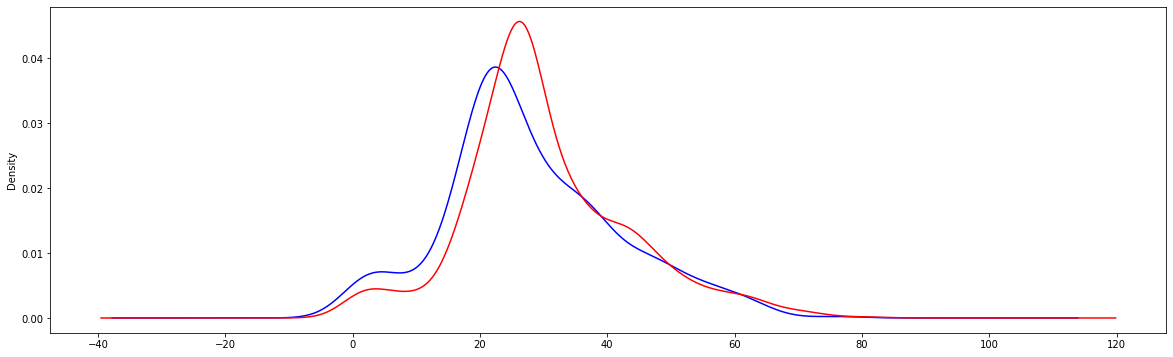

In [89]:
# TODO implement
woman_Age.plot(kind = "density", figsize = (20,6) ,color = 'blue', subplots=True )
man_Age.plot(kind = "density", figsize = (20,6) ,color = 'red', subplots=True )

 5) Visualisieren Sie den Zusammenhang zwischen dem Alter und dem Ticketpreis in einem scatter plot. Interpretieren Sie das Resultat.

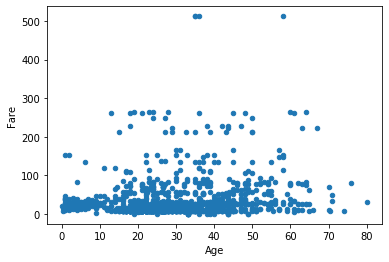

In [90]:
# TODO implement
df1 = df[['Age','Fare']]
df1.plot.scatter(x = "Age", y = "Fare")
#Preis nicht alter Abhängig
#Einige Daten sind 0

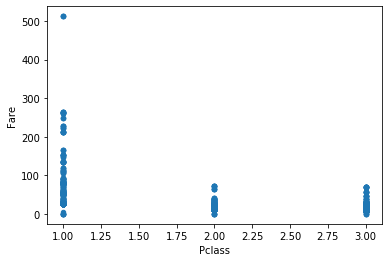

In [91]:
df1 = df[['Pclass','Fare']]
df1.plot.scatter(x = "Pclass", y = "Fare")

In den bisherigen Plots haben wir einzelne Merkmale unabhängig der Klassenzugehörigkeiten 'Surived' dargestellt. Um die vorliegenden Daten besser zu verstehen und trennungswirksame Merkmale zu identifizieren soll nun untersucht werden wie sich die einzelnen Merkmale in Bezug auf die später vorherzusagende Klasse verhalten.

6) Untersuchen Sie die Korrelation zwischen dem Geschlecht und den Überleben der Katastrophe. Erstellen Sie eine oder mehrere geeignete Visualisierung(en) und interpretieren Sie diese.


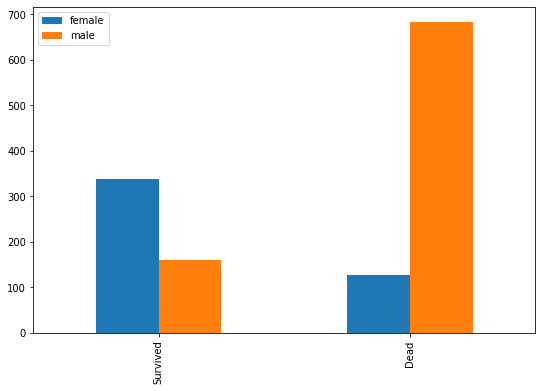

In [37]:
# TODO implement
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
p = pd.DataFrame([survived_sex,dead_sex])
p.index = ['Survived','Dead']
p.plot(kind='bar',stacked=False, figsize=(9,6))


7) Untersuchen Sie die Korrelation zwischen dem Alter und den Überleben der Katastrophe. Erstellen Sie eine geeignete Visualisierung und interpretieren Sie diese.

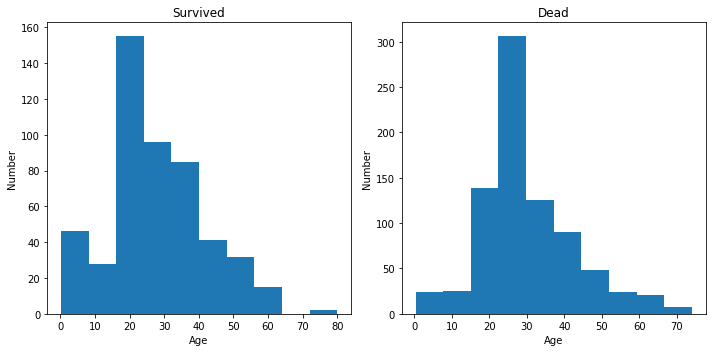

In [95]:
# TODO implement
survived = [df[df['Survived']==1]['Age']]
dead =[df[df['Survived']==0]['Age']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(survived)
axes[1].hist(dead)
axes[0].set_title('Survived')
axes[1].set_title('Dead')

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number')


fig.tight_layout()

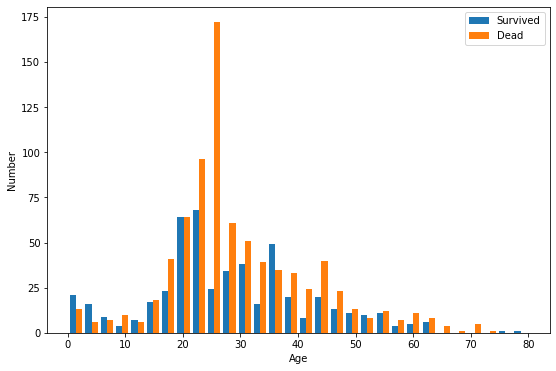

In [74]:
figure = plt.figure(figsize=(9,6))
plt.hist([df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']], stacked=False,
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number')
plt.legend()

8) Untersuchen Sie die Korrelation zwischen Passagier Klasse und den Überleben der Katastrophe. Erstellen Sie eine oder mehrere geeignete Visualisierungen und interpretieren Sie diese.

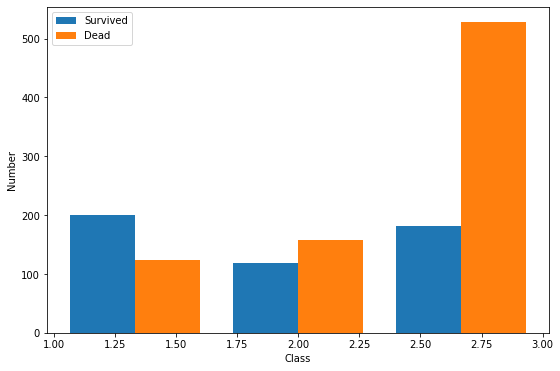

In [73]:
# TODO implement
figure = plt.figure(figsize=(9,6))
plt.hist([df[df['Survived']==1]['Pclass'],df[df['Survived']==0]['Pclass']], stacked=False,
         bins = 3,label = ['Survived','Dead'])
plt.xlabel('Class')
plt.ylabel('Number')
plt.legend()

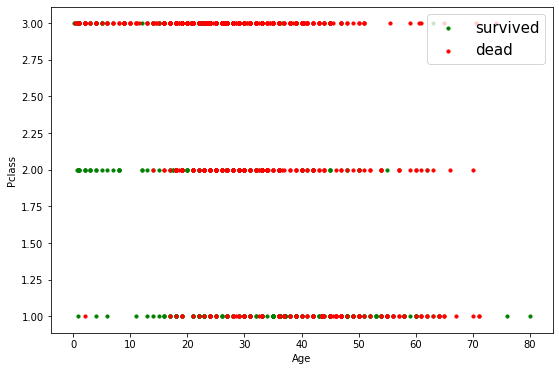

In [81]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.scatter(df[df['Survived']==1]['Age'],df[df['Survived']==1]['Pclass'],c='green',s=10)
ax.scatter(df[df['Survived']==0]['Age'],df[df['Survived']==0]['Pclass'],c='red',s=10)
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)